## Preliminary tests
TO test : OSVM, Isolation Forest, Decision tree, LocalOutlierFactor, NN

In [324]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy import stats
import seaborn as sns
import pickle as pkl

In [205]:
# Load data
from scipy.io import loadmat
x = loadmat('data/satimage-2.mat')
X = x["X"]
y = x["y"]
y = [val[0] for val in y]

print("Number of observations : ",X.shape[0])
print("Number of variables : ",X.shape[1])

In [335]:
def plot_confusion(y_pred, y=y):
    labels = ['Inliers','Outlier']
    sns.heatmap(confusion_matrix(y_true = y,y_pred = y_pred), xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Reds") 
    plt.title('Matrice de confusion')
    plt.show()


# pyod library
https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

TODO
- nb of FP and FN as a function of contamination score for each method
- compare with contamination score
--> what happens if the contamination rate is not good at all ? under/overestimate ==> impact 
--> theoretically 
- fine tuning :
    - number of neighbors
    - HBOS & AE ?
- compare anomaly detection from outlier detection ? (use test & train?)
- comparison of algos : how much is it sensitive to parameter tuning ? + add time estimate ? 

In [260]:
# # ! pip install pyod
# knn
from pyod.models.knn import KNN
# angle based
from pyod.models.abod import ABOD
# histogram
from pyod.models.hbos import HBOS
# autoencoders
from pyod.models.auto_encoder import AutoEncoder

In [333]:
# # estimate outlier fraction only based on trainset
# outlier_fraction = sum(y_train)/len(y_train)

# estimate outlier fraction only based on entire dataset
outlier_fraction = sum(y)/len(y)

print("Fraction of outliers in the dataset : ", outlier_fraction)

Fraction of outliers in the dataset :  0.0122350508357746


In [341]:
args = {}
args["contamination"] = [outlier_fraction, 1e-10, 1e-3, 1e-2, outlier_fraction/2, outlier_fraction*2, 0.5, 0.99]
args["n_neighbors"] = 5

In [299]:
# Initialize classifier
classifiers = {
     'ABOD'   : ABOD(contamination=outlier_fraction, n_neighbors=args["n_neighbors"]),
     'KNN' :  KNN(contamination=outlier_fraction, n_neighbors=args["n_neighbors"]),
     'Average KNN': KNN(method='mean',contamination=outlier_fraction, n_neighbors=args["n_neighbors"]),
     'Median KNN': KNN(method='median',contamination=outlier_fraction, n_neighbors=args["n_neighbors"]),
     'HBOS' : HBOS(contamination=outlier_fraction),
     'AutoEncoder' : AutoEncoder(contamination=outlier_fraction)
}

In [321]:
print(classifiers["KNN"])
print(classifiers["HBOS"])
print(classifiers["AutoEncoder"])

KNN(algorithm='auto', contamination=0.0122350508357746, leaf_size=30,
  method='largest', metric='minkowski', metric_params=None, n_jobs=1,
  n_neighbors=5, p=2, radius=1.0)
HBOS(alpha=0.1, contamination=0.0122350508357746, n_bins=10, tol=0.5)
AutoEncoder(batch_size=32, contamination=0.0122350508357746, dropout_rate=0.2,
      epochs=100, hidden_activation='relu',
      hidden_neurons=[64, 32, 32, 64], l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000021513F3EC18>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)


In [304]:
df_result = pd.DataFrame({"y" : np.array(y).astype(int)})

In [339]:
clf.contamination=10
clf

AutoEncoder(batch_size=32, contamination=10, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[64, 32, 32, 64],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000021513F3EC18>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)


---------------------ABOD---------------------
Classifier with correct contamination :  ABOD(contamination=0.5, method='fast', n_neighbors=5)

----Contamination rate : 0.0122350508357746----
threshold value :  4.003618007209692e-09
Number of outliers :  126 
Number of inliers :  5677
Number of errors :  169


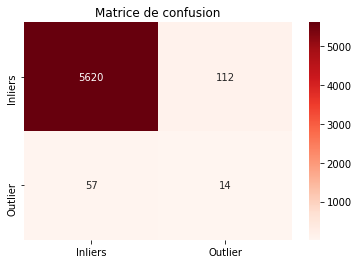


----Contamination rate : 1e-10----
threshold value :  4.003618007209692e-09
Number of outliers :  2 
Number of inliers :  5801
Number of errors :  71


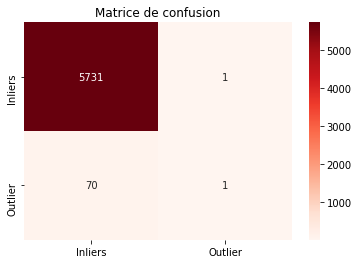


----Contamination rate : 0.001----
threshold value :  4.003618007209692e-09
Number of outliers :  19 
Number of inliers :  5784
Number of errors :  80


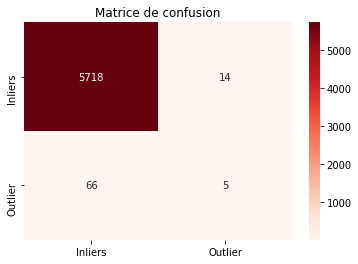


----Contamination rate : 0.01----
threshold value :  4.003618007209692e-09
Number of outliers :  101 
Number of inliers :  5702
Number of errors :  152


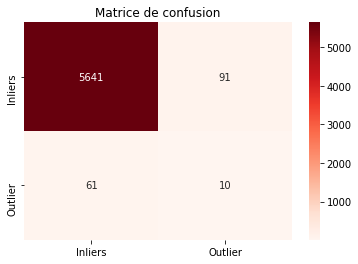


----Contamination rate : 0.0061175254178873----
threshold value :  4.003618007209692e-09
Number of outliers :  78 
Number of inliers :  5725
Number of errors :  129


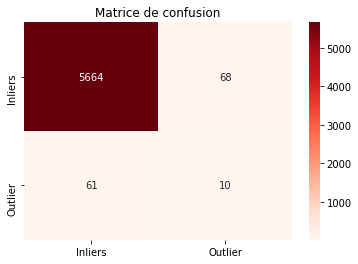


----Contamination rate : 0.0244701016715492----
threshold value :  4.003618007209692e-09
Number of outliers :  226 
Number of inliers :  5577
Number of errors :  261


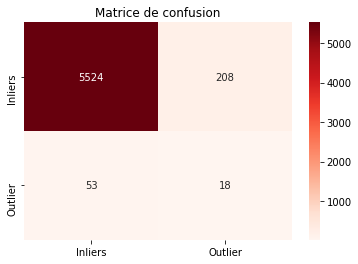


----Contamination rate : 0.5----
threshold value :  4.003618007209692e-09
Number of outliers :  3203 
Number of inliers :  2600
Number of errors :  3152


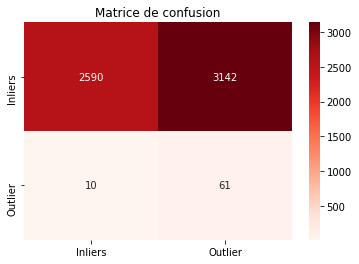


----Contamination rate : 0.99----
threshold value :  4.003618007209692e-09
Number of outliers :  5730 
Number of inliers :  73
Number of errors :  5659


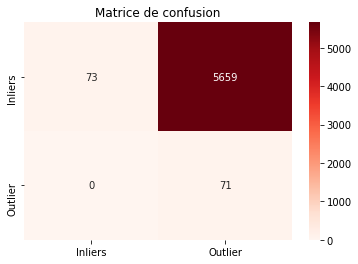


---------------------KNN---------------------
Classifier with correct contamination :  KNN(algorithm='auto', contamination=0.0122350508357746, leaf_size=30,
  method='largest', metric='minkowski', metric_params=None, n_jobs=1,
  n_neighbors=5, p=2, radius=1.0)

----Contamination rate : 0.0122350508357746----
threshold value :  -52.34606027474241
Number of outliers :  59 
Number of inliers :  5744
Number of errors :  78


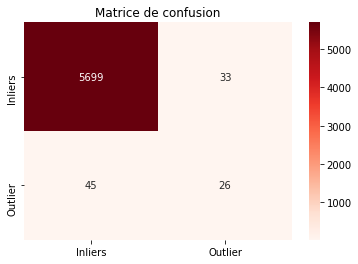


----Contamination rate : 1e-10----
threshold value :  -52.34606027474241
Number of outliers :  0 
Number of inliers :  5803
Number of errors :  71


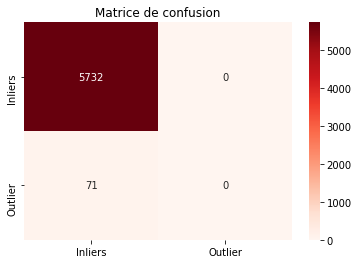


----Contamination rate : 0.001----
threshold value :  -52.34606027474241
Number of outliers :  4 
Number of inliers :  5799
Number of errors :  67


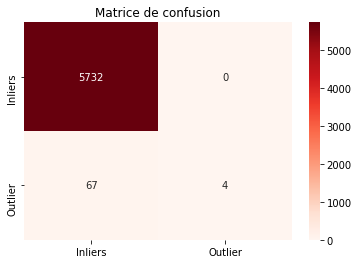


----Contamination rate : 0.01----
threshold value :  -52.34606027474241
Number of outliers :  52 
Number of inliers :  5751
Number of errors :  79


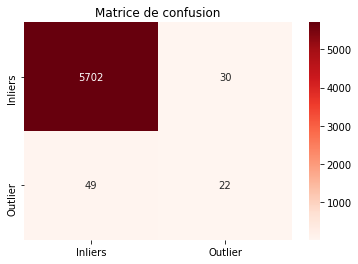


----Contamination rate : 0.0061175254178873----
threshold value :  -52.34606027474241
Number of outliers :  32 
Number of inliers :  5771
Number of errors :  69


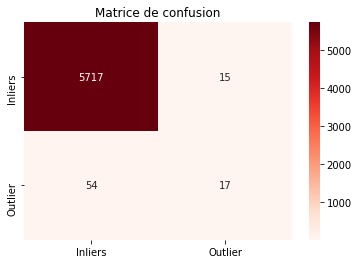


----Contamination rate : 0.0244701016715492----
threshold value :  -52.34606027474241
Number of outliers :  114 
Number of inliers :  5689
Number of errors :  123


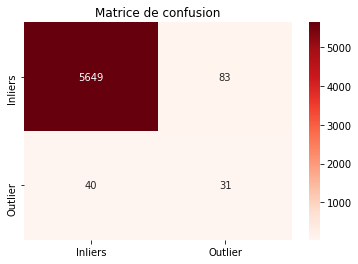


----Contamination rate : 0.5----
threshold value :  -52.34606027474241
Number of outliers :  2731 
Number of inliers :  3072
Number of errors :  2660


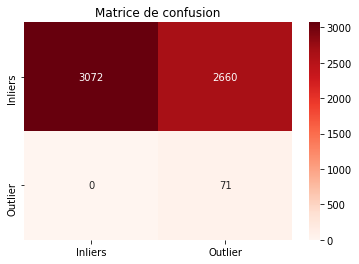


----Contamination rate : 0.99----
threshold value :  -52.34606027474241
Number of outliers :  5714 
Number of inliers :  89
Number of errors :  5643


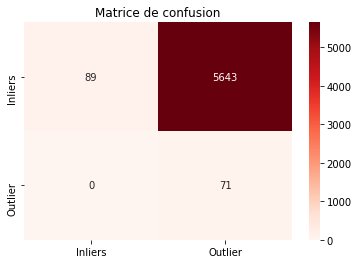


---------------------Average KNN---------------------
Classifier with correct contamination :  KNN(algorithm='auto', contamination=0.0122350508357746, leaf_size=30,
  method='mean', metric='minkowski', metric_params=None, n_jobs=1,
  n_neighbors=5, p=2, radius=1.0)

----Contamination rate : 0.0122350508357746----
threshold value :  -37.92105650271627
Number of outliers :  26 
Number of inliers :  5777
Number of errors :  69


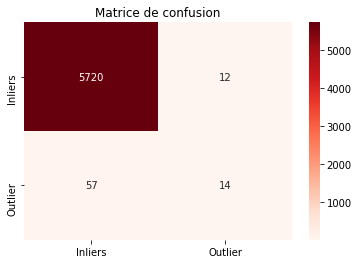


----Contamination rate : 1e-10----
threshold value :  -37.92105650271627
Number of outliers :  0 
Number of inliers :  5803
Number of errors :  71


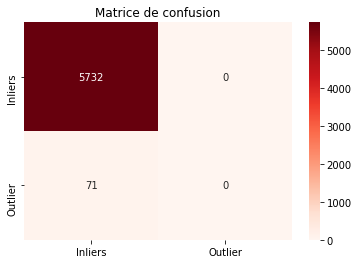


----Contamination rate : 0.001----
threshold value :  -37.92105650271627
Number of outliers :  0 
Number of inliers :  5803
Number of errors :  71


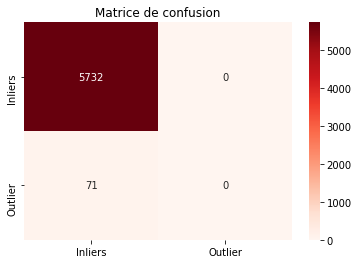


----Contamination rate : 0.01----
threshold value :  -37.92105650271627
Number of outliers :  21 
Number of inliers :  5782
Number of errors :  66


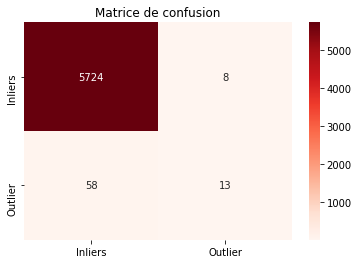


----Contamination rate : 0.0061175254178873----
threshold value :  -37.92105650271627
Number of outliers :  15 
Number of inliers :  5788
Number of errors :  64


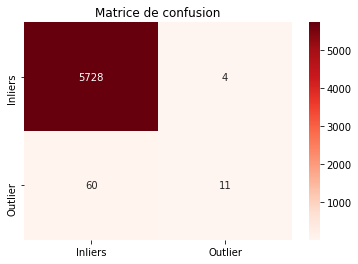


----Contamination rate : 0.0244701016715492----
threshold value :  -37.92105650271627
Number of outliers :  31 
Number of inliers :  5772
Number of errors :  72


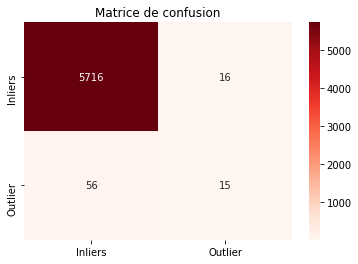


----Contamination rate : 0.5----
threshold value :  -37.92105650271627
Number of outliers :  1219 
Number of inliers :  4584
Number of errors :  1170


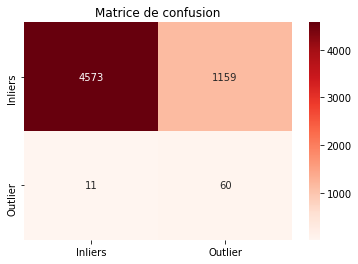


----Contamination rate : 0.99----
threshold value :  -37.92105650271627
Number of outliers :  4446 
Number of inliers :  1357
Number of errors :  4375


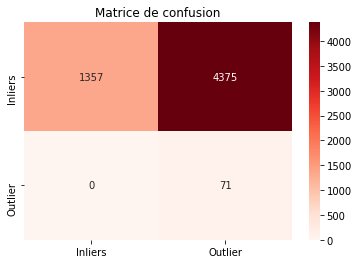


---------------------Median KNN---------------------
Classifier with correct contamination :  KNN(algorithm='auto', contamination=0.0122350508357746, leaf_size=30,
  method='median', metric='minkowski', metric_params=None, n_jobs=1,
  n_neighbors=5, p=2, radius=1.0)

----Contamination rate : 0.0122350508357746----
threshold value :  -46.671663230130754
Number of outliers :  40 
Number of inliers :  5763
Number of errors :  79


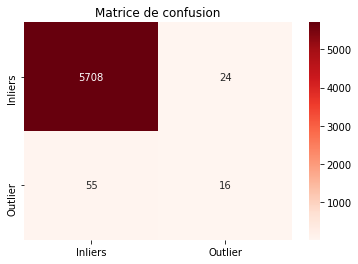


----Contamination rate : 1e-10----
threshold value :  -46.671663230130754
Number of outliers :  0 
Number of inliers :  5803
Number of errors :  71


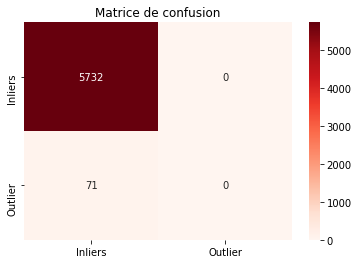


----Contamination rate : 0.001----
threshold value :  -46.671663230130754
Number of outliers :  3 
Number of inliers :  5800
Number of errors :  68


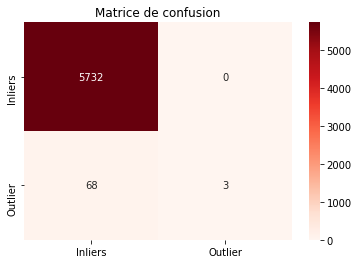


----Contamination rate : 0.01----
threshold value :  -46.671663230130754
Number of outliers :  35 
Number of inliers :  5768
Number of errors :  74


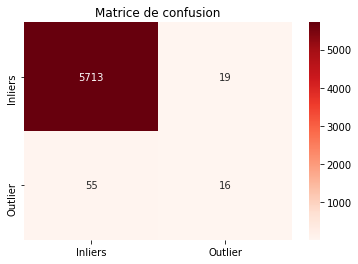


----Contamination rate : 0.0061175254178873----
threshold value :  -46.671663230130754
Number of outliers :  28 
Number of inliers :  5775
Number of errors :  71


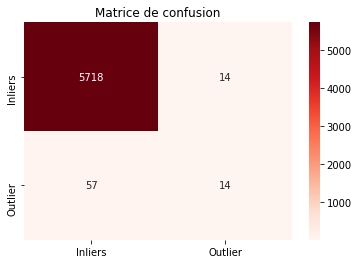


----Contamination rate : 0.0244701016715492----
threshold value :  -46.671663230130754
Number of outliers :  94 
Number of inliers :  5709
Number of errors :  117


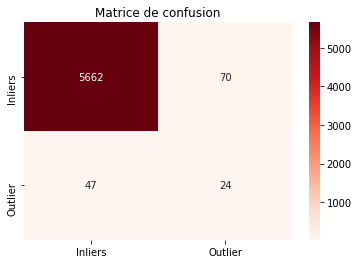


----Contamination rate : 0.5----
threshold value :  -46.671663230130754
Number of outliers :  2534 
Number of inliers :  3269
Number of errors :  2467


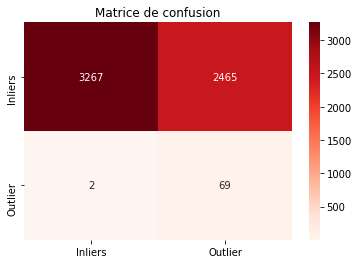


----Contamination rate : 0.99----
threshold value :  -46.671663230130754
Number of outliers :  5689 
Number of inliers :  114
Number of errors :  5618


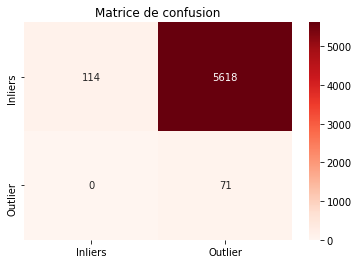


---------------------HBOS---------------------
Classifier with correct contamination :  HBOS(alpha=0.1, contamination=0.0122350508357746, n_bins=10, tol=0.5)

----Contamination rate : 0.0122350508357746----
threshold value :  -115.9258864940273
Number of outliers :  71 
Number of inliers :  5732
Number of errors :  50


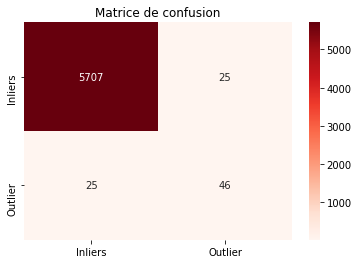


----Contamination rate : 1e-10----
threshold value :  -115.9258864940273
Number of outliers :  1 
Number of inliers :  5802
Number of errors :  70


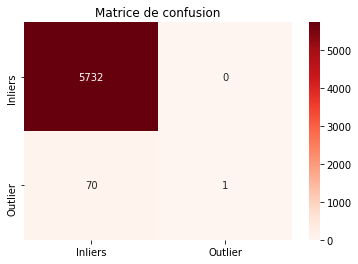


----Contamination rate : 0.001----
threshold value :  -115.9258864940273
Number of outliers :  6 
Number of inliers :  5797
Number of errors :  65


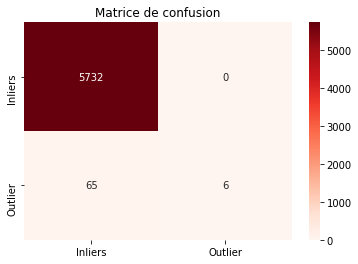


----Contamination rate : 0.01----
threshold value :  -115.9258864940273
Number of outliers :  59 
Number of inliers :  5744
Number of errors :  42


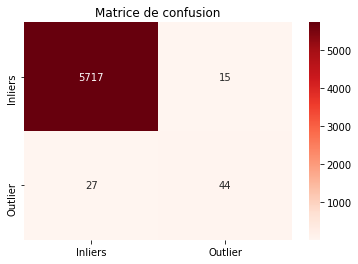


----Contamination rate : 0.0061175254178873----
threshold value :  -115.9258864940273
Number of outliers :  36 
Number of inliers :  5767
Number of errors :  45


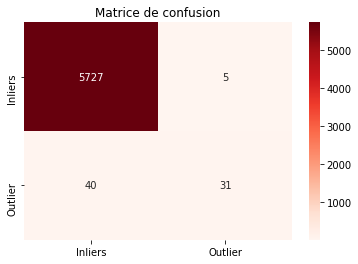


----Contamination rate : 0.0244701016715492----
threshold value :  -115.9258864940273
Number of outliers :  142 
Number of inliers :  5661
Number of errors :  97


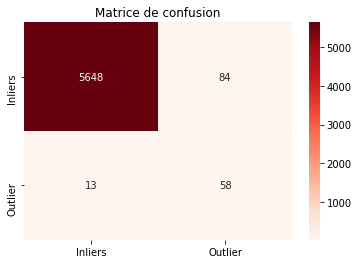


----Contamination rate : 0.5----
threshold value :  -115.9258864940273
Number of outliers :  2901 
Number of inliers :  2902
Number of errors :  2832


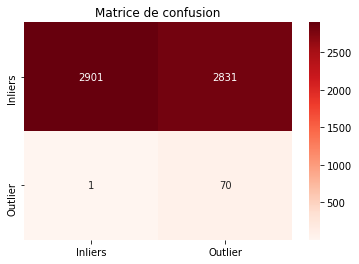


----Contamination rate : 0.99----
threshold value :  -115.9258864940273
Number of outliers :  5744 
Number of inliers :  59
Number of errors :  5673


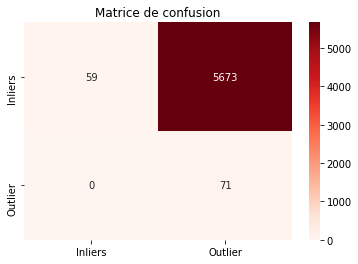


---------------------AutoEncoder---------------------
Classifier with correct contamination :  AutoEncoder(batch_size=32, contamination=10, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[64, 32, 32, 64],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000021513F3EC18>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

----Contamination rate : 0.0122350508357746----
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 36)                1332      
_________________________________________________________________
dropout_7 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 36)                1332      
___________

5222/5222 [==============================] - 1s 202us/step - loss: 1.0852 - val_loss: 1.1451
Epoch 54/100
5222/5222 [==============================] - 1s 209us/step - loss: 1.0794 - val_loss: 1.1388
Epoch 55/100
5222/5222 [==============================] - 1s 202us/step - loss: 1.0729 - val_loss: 1.1333
Epoch 56/100
5222/5222 [==============================] - 1s 205us/step - loss: 1.0672 - val_loss: 1.1279
Epoch 57/100
5222/5222 [==============================] - 1s 201us/step - loss: 1.0620 - val_loss: 1.1230
Epoch 58/100
5222/5222 [==============================] - 1s 207us/step - loss: 1.0573 - val_loss: 1.1184
Epoch 59/100
5222/5222 [==============================] - 1s 205us/step - loss: 1.0524 - val_loss: 1.1139
Epoch 60/100
5222/5222 [==============================] - 1s 206us/step - loss: 1.0480 - val_loss: 1.1099
Epoch 61/100
5222/5222 [==============================] - 1s 202us/step - loss: 1.0438 - val_loss: 1.1059
Epoch 62/100
5222/5222 [==============================] - 1

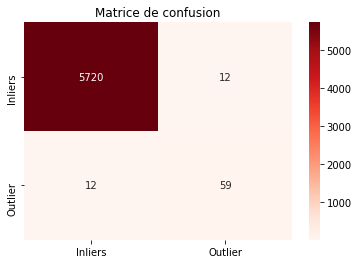


----Contamination rate : 1e-10----
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_13 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_14 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2368      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)  

5222/5222 [==============================] - 1s 204us/step - loss: 1.0692 - val_loss: 1.0527
Epoch 58/100
5222/5222 [==============================] - 1s 203us/step - loss: 1.0645 - val_loss: 1.0479
Epoch 59/100
5222/5222 [==============================] - 1s 200us/step - loss: 1.0597 - val_loss: 1.0435
Epoch 60/100
5222/5222 [==============================] - 1s 209us/step - loss: 1.0554 - val_loss: 1.0393
Epoch 61/100
5222/5222 [==============================] - 1s 200us/step - loss: 1.0511 - val_loss: 1.0354
Epoch 62/100
5222/5222 [==============================] - 1s 200us/step - loss: 1.0474 - val_loss: 1.0318
Epoch 63/100
5222/5222 [==============================] - 1s 201us/step - loss: 1.0438 - val_loss: 1.0284
Epoch 64/100
5222/5222 [==============================] - 1s 200us/step - loss: 1.0404 - val_loss: 1.0252
Epoch 65/100
5222/5222 [==============================] - 1s 202us/step - loss: 1.0372 - val_loss: 1.0222
Epoch 66/100
5222/5222 [==============================] - 1

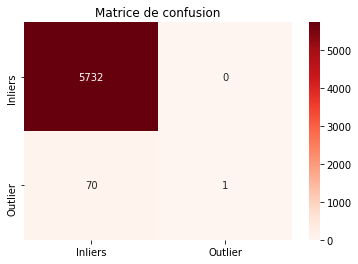


----Contamination rate : 0.001----
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_19 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_20 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                2368      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)  

Epoch 58/100
5222/5222 [==============================] - 1s 209us/step - loss: 1.0715 - val_loss: 1.0170
Epoch 59/100
5222/5222 [==============================] - 1s 219us/step - loss: 1.0666 - val_loss: 1.0123
Epoch 60/100
5222/5222 [==============================] - 1s 223us/step - loss: 1.0619 - val_loss: 1.0081
Epoch 61/100
5222/5222 [==============================] - 1s 231us/step - loss: 1.0576 - val_loss: 1.0039
Epoch 62/100
5222/5222 [==============================] - 1s 217us/step - loss: 1.0535 - val_loss: 1.0002
Epoch 63/100
5222/5222 [==============================] - 1s 214us/step - loss: 1.0496 - val_loss: 0.9967
Epoch 64/100
5222/5222 [==============================] - 1s 210us/step - loss: 1.0462 - val_loss: 0.9933
Epoch 65/100
5222/5222 [==============================] - 1s 212us/step - loss: 1.0429 - val_loss: 0.9903
Epoch 66/100
5222/5222 [==============================] - 1s 225us/step - loss: 1.0399 - val_loss: 0.9873
Epoch 67/100
5222/5222 [======================

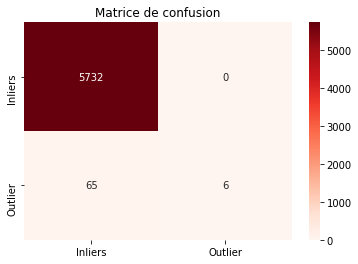


----Contamination rate : 0.01----
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_25 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_26 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                2368      
_________________________________________________________________
dropout_27 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)   

Epoch 58/100
5222/5222 [==============================] - 1s 206us/step - loss: 1.0652 - val_loss: 1.0108
Epoch 59/100
5222/5222 [==============================] - 1s 206us/step - loss: 1.0609 - val_loss: 1.0066
Epoch 60/100
5222/5222 [==============================] - 1s 205us/step - loss: 1.0566 - val_loss: 1.0026
Epoch 61/100
5222/5222 [==============================] - 1s 208us/step - loss: 1.0526 - val_loss: 0.9989
Epoch 62/100
5222/5222 [==============================] - 1s 219us/step - loss: 1.0490 - val_loss: 0.9954
Epoch 63/100
5222/5222 [==============================] - 1s 208us/step - loss: 1.0455 - val_loss: 0.9921
Epoch 64/100
5222/5222 [==============================] - 1s 206us/step - loss: 1.0421 - val_loss: 0.9892
Epoch 65/100
5222/5222 [==============================] - 1s 207us/step - loss: 1.0392 - val_loss: 0.9864
Epoch 66/100
5222/5222 [==============================] - 1s 207us/step - loss: 1.0364 - val_loss: 0.9837
Epoch 67/100
5222/5222 [======================

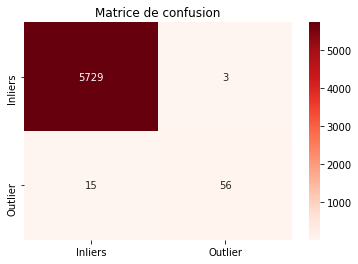


----Contamination rate : 0.0061175254178873----
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_31 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_32 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                2368      
_________________________________________________________________
dropout_33 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense

5222/5222 [==============================] - 1s 226us/step - loss: 1.0629 - val_loss: 1.1186
Epoch 58/100
5222/5222 [==============================] - 1s 221us/step - loss: 1.0582 - val_loss: 1.1141
Epoch 59/100
5222/5222 [==============================] - 1s 231us/step - loss: 1.0536 - val_loss: 1.1098
Epoch 60/100
5222/5222 [==============================] - 1s 216us/step - loss: 1.0493 - val_loss: 1.1058
Epoch 61/100
5222/5222 [==============================] - 1s 228us/step - loss: 1.0452 - val_loss: 1.1020
Epoch 62/100
5222/5222 [==============================] - 1s 216us/step - loss: 1.0413 - val_loss: 1.0986
Epoch 63/100
5222/5222 [==============================] - 1s 216us/step - loss: 1.0377 - val_loss: 1.0950
Epoch 64/100
5222/5222 [==============================] - 1s 215us/step - loss: 1.0342 - val_loss: 1.0919
Epoch 65/100
5222/5222 [==============================] - 1s 225us/step - loss: 1.0310 - val_loss: 1.0890
Epoch 66/100
5222/5222 [==============================] - 1

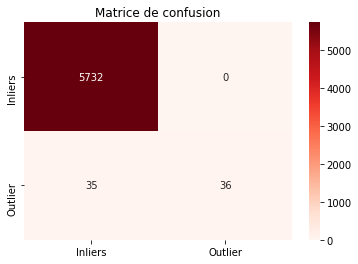


----Contamination rate : 0.0244701016715492----
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_37 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_38 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                2368      
_________________________________________________________________
dropout_39 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense

5222/5222 [==============================] - 1s 215us/step - loss: 1.0695 - val_loss: 1.0668
Epoch 58/100
5222/5222 [==============================] - 1s 216us/step - loss: 1.0645 - val_loss: 1.0620
Epoch 59/100
5222/5222 [==============================] - 1s 233us/step - loss: 1.0596 - val_loss: 1.0573
Epoch 60/100
5222/5222 [==============================] - 1s 218us/step - loss: 1.0552 - val_loss: 1.0530
Epoch 61/100
5222/5222 [==============================] - 3s 491us/step - loss: 1.0508 - val_loss: 1.0490
Epoch 62/100
5222/5222 [==============================] - 1s 237us/step - loss: 1.0468 - val_loss: 1.0452
Epoch 63/100
5222/5222 [==============================] - 2s 430us/step - loss: 1.0430 - val_loss: 1.0418
Epoch 64/100
5222/5222 [==============================] - 2s 404us/step - loss: 1.0395 - val_loss: 1.0382
Epoch 65/100
5222/5222 [==============================] - 1s 233us/step - loss: 1.0363 - val_loss: 1.0351
Epoch 66/100
5222/5222 [==============================] - 1

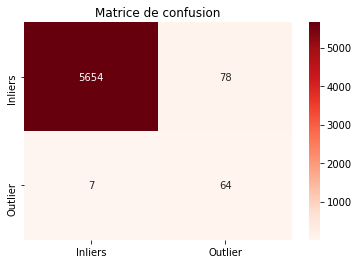


----Contamination rate : 0.5----
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_43 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_44 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                2368      
_________________________________________________________________
dropout_45 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_53 (Dense)    

5222/5222 [==============================] - 1s 194us/step - loss: 1.0661 - val_loss: 1.1053
Epoch 58/100
5222/5222 [==============================] - 1s 197us/step - loss: 1.0611 - val_loss: 1.1007
Epoch 59/100
5222/5222 [==============================] - 1s 194us/step - loss: 1.0567 - val_loss: 1.0961
Epoch 60/100
5222/5222 [==============================] - 1s 195us/step - loss: 1.0524 - val_loss: 1.0919
Epoch 61/100
5222/5222 [==============================] - 1s 197us/step - loss: 1.0481 - val_loss: 1.0880
Epoch 62/100
5222/5222 [==============================] - 1s 195us/step - loss: 1.0442 - val_loss: 1.0843
Epoch 63/100
5222/5222 [==============================] - 1s 194us/step - loss: 1.0405 - val_loss: 1.0808
Epoch 64/100
5222/5222 [==============================] - 1s 210us/step - loss: 1.0370 - val_loss: 1.0777
Epoch 65/100
5222/5222 [==============================] - 1s 197us/step - loss: 1.0340 - val_loss: 1.0746
Epoch 66/100
5222/5222 [==============================] - 1

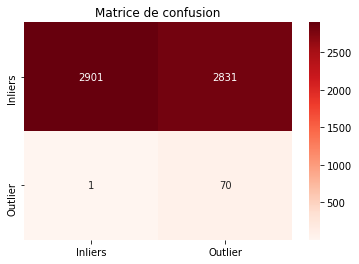


----Contamination rate : 0.99----
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_49 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 36)                1332      
_________________________________________________________________
dropout_50 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 64)                2368      
_________________________________________________________________
dropout_51 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_60 (Dense)   

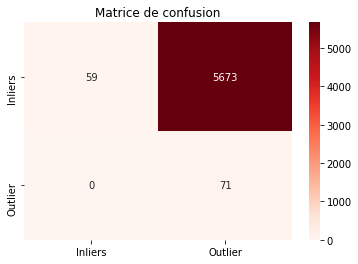

In [342]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    print("\n---------------------"+clf_name+"---------------------")
    print("Classifier with correct contamination : ", clf)
    
    for contamination in args["contamination"]:
        print('\n----Contamination rate : '+str(contamination)+'----')
        # update contamination
        clf.contamination=contamination
        
        if contamination == outlier_fraction:
            contamination_name = "outlier"
        else :
            contamination_name = str(contamination)
        
        # Fit 
        clf.fit(X)

        # Predict raw anomaly score
        scores_pred = -clf.decision_function(X) 
        df_result[str("score_"+clf_name+contamination_name)] = scores_pred

        # Threshold value to consider a datapoint inlier or outlier
        threshold = stats.scoreatpercentile(scores_pred,100 * outlier_fraction)
        print("threshold value : ", threshold)
        df_result[str("thres_"+clf_name+contamination_name)] = threshold

        # Prediction 
        y_pred = clf.predict(X)
        n_inliers = len(y_pred) - np.count_nonzero(y_pred)
        n_outliers = np.count_nonzero(y_pred == 1)
        df_result[str("y_pred_"+clf_name+contamination_name)] = y_pred.tolist()
        print('Number of outliers : ',n_outliers,'\nNumber of inliers : ',n_inliers)

        # no of errors in prediction
        n_errors = (y_pred != y).sum()
        print('Number of errors : ',n_errors)

        # plot confusion matrix
        plot_confusion(y_pred, y=y)

In [347]:
df_result

,y,score_ABODoutlier,thres_ABODoutlier,y_pred_ABODoutlier,score_ABOD1e-10,thres_ABOD1e-10,y_pred_ABOD1e-10,score_ABOD0.001,thres_ABOD0.001,y_pred_ABOD0.001,...,y_pred_AutoEncoder0.0061175254178873,score_AutoEncoder0.0244701016715492,thres_AutoEncoder0.0244701016715492,y_pred_AutoEncoder0.0244701016715492,score_AutoEncoder0.5,thres_AutoEncoder0.5,y_pred_AutoEncoder0.5,score_AutoEncoder0.99,thres_AutoEncoder0.99,y_pred_AutoEncoder0.99
0,0,5.675823e-08,4.003618e-09,0,5.675823e-08,4.003618e-09,0,5.675823e-08,4.003618e-09,0,...,0,-8.423336,-11.332977,0,-8.422806,-11.333593,1,-8.424103,-11.33217,1
1,0,1.643679e-07,4.003618e-09,0,1.643679e-07,4.003618e-09,0,1.643679e-07,4.003618e-09,0,...,0,-5.546619,-11.332977,0,-5.546097,-11.333593,1,-5.547350,-11.33217,1
2,0,1.851756e-07,4.003618e-09,0,1.851756e-07,4.003618e-09,0,1.851756e-07,4.003618e-09,0,...,0,-4.032240,-11.332977,0,-4.031694,-11.333593,0,-4.032903,-11.33217,1
3,0,1.466669e-07,4.003618e-09,0,1.466669e-07,4.003618e-09,0,1.466669e-07,4.003618e-09,0,...,0,-3.512652,-11.332977,0,-3.512223,-11.333593,0,-3.513292,-11.33217,1
4,0,1.383220e-08,4.003618e-09,0,1.383220e-08,4.003618e-09,0,1.383220e-08,4.003618e-09,0,...,0,-3.540757,-11.332977,0,-3.540263,-11.333593,0,-3.541427,-11.33217,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798,1,1.043304e-08,4.003618e-09,0,1.043304e-08,4.003618e-09,0,1.043304e-08,4.003618e-09,0,...,0,-8.604003,-11.332977,0,-8.603927,-11.333593,1,-8.603967,-11.33217,1
5799,1,2.527300e-08,4.003618e-09,0,2.527300e-08,4.003618e-09,0,2.527300e-08,4.003618e-09,0,...,1,-17.266933,-11.332977,1,-17.266899,-11.333593,1,-17.267016,-11.33217,1
5800,1,5.971701e-08,4.003618e-09,0,5.971701e-08,4.003618e-09,0,5.971701e-08,4.003618e-09,0,...,1,-16.022028,-11.332977,1,-16.022021,-11.333593,1,-16.022073,-11.33217,1
5801,1,2.346184e-08,4.003618e-09,0,2.346184e-08,4.003618e-09,0,2.346184e-08,4.003618e-09,0,...,1,-14.453464,-11.332977,1,-14.453496,-11.333593,1,-14.453465,-11.33217,1


In [343]:
pkl.dump(df_result,open('pickles/df_result.pkl', 'wb') )